In [82]:
import pandas as pd
data = pd.read_csv('lsd_math_score_data.csv')
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [83]:
print(data)
"""
LSD_ppm - LSD Tissue Concentration measured in parts per million
"""

   Time_Delay_in_Minutes  LSD_ppm  Avg_Math_Test_Score
0                      5     1.17                78.93
1                     15     2.97                58.20
2                     30     3.26                67.47
3                     60     4.69                37.47
4                    120     5.83                45.65
5                    240     6.00                32.92
6                    480     6.41                29.97


'\nLSD_ppm - LSD Tissue Concentration measured in parts per million\n'

In [84]:
# time = data['Time_Delay_in_Minutes'] --> Will get us a series not data frame
time = data[['Time_Delay_in_Minutes']]
LSD = data[['LSD_ppm']]
Average = data[['Avg_Math_Test_Score']]

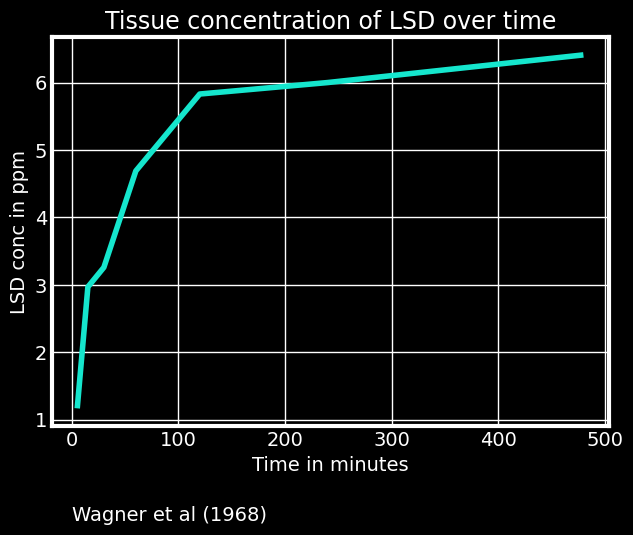

In [85]:
#Add this line to code to export the charts along withe notebooks
%matplotlib inline
plt.title('Tissue concentration of LSD over time', fontsize=17)
plt.xlabel('Time in minutes', fontsize=14)
plt.ylabel('LSD conc in ppm', fontsize=14)

#Using premade style (Will override the above style)
plt.style.use('dark_background')

plt.text(0,-0.5, "Wagner et al (1968)")
plt.plot(time,LSD, color='#15E6CD')

plt.show()

In [86]:
#Machine Learning Part 
#Creating a regression object
regr = LinearRegression()
regr.fit(LSD, Average)#Arguments need to be a dataframe
regr.coef_ #gradient ->array([[]]) so we need to extract [0][0]th item
print(f"m: {regr.coef_[0][0]}")
print(f"c: {regr.intercept_[0]}")
#y=mx+c ->Linear regression function

# To find the R^2 or goodness of fit
print(f"R squared: {regr.score(LSD, Average)}")
predicted_score=regr.predict(LSD)

m: -9.009466415296783
c: 89.12387376799306
R squared: 0.8778349707775888


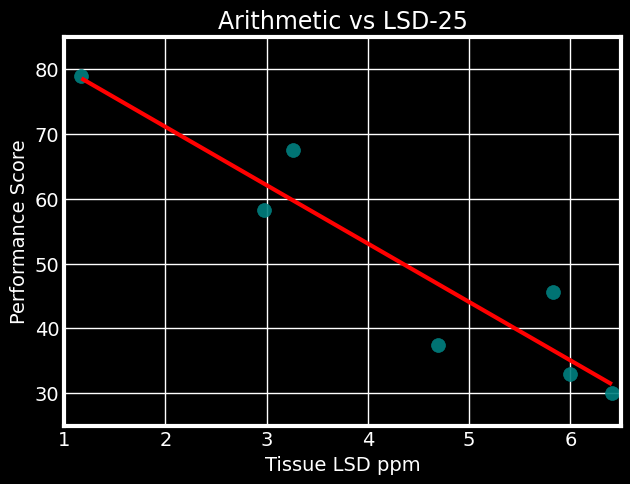

In [87]:
%matplotlib inline

#Styling
plt.title('Arithmetic vs LSD-25', fontsize=17)
plt.xlabel('Tissue LSD ppm', fontsize=14)
plt.ylabel('Performance Score', fontsize=14)
plt.ylim(25, 85)
plt.xlim(1, 6.5)
plt.style.use('dark_background')


#Plotting
plt.scatter(LSD, Average, color='teal', s=100, alpha=0.9)
plt.plot(LSD, predicted_score, color='red', linewidth=3)
plt.show()